In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal, optimize
from tqdm import tqdm
import pandas as pd

import os, sys
rootpath = os.path.join(os.getcwd(), '.')
sys.path.append(rootpath)
from src.analysis import *
from src.theory import *
# reimport modules if they change
%load_ext autoreload
%autoreload 2

In [29]:
# specify system parameters
params = {
    'N': 100000, # number of nodes
# not required for mean-field:    'K': 100, # number of connections per node
    'mu': 0.2, # fraction of nodes that receive input
    'sigma': 0.01, # std of additive Gaussian noise
    'epsilon': 0.01, # error threshold for overlap
}

In [34]:
from tqdm import tqdm

# support for pmf of Fokker Planck
x = np.arange(0, params["N"] + 1)

# select hs
hs = np.array([1e-4, 1e-3, 1e-2, 1e-1])
# lambda range in logspace
min_scale=-7
max_scale=0
lams = 1 - 10**np.linspace(min_scale, max_scale, (max_scale-min_scale)*5+1)[::-1]
print(lams)
# lams = 1 - 10**np.linspace(-5, -0, 7*8+1)[::-1]

variances = dict()
variances['lams'] = lams
for h in hs:
    tmp = []
    for lam in tqdm(lams):
        pmf = pmf_from_coupled_fokker_planck(params, h=h, lam=lam, return_only_pmf=True)
        # variance of distribution from the pmf
        variance = np.sum((x - np.sum(x * pmf))**2 * pmf)
        tmp.append(variance)
    variances[h] = np.array(tmp)

[0.         0.36904266 0.60189283 0.74881136 0.84151068 0.9
 0.93690427 0.96018928 0.97488114 0.98415107 0.99       0.99369043
 0.99601893 0.99748811 0.99841511 0.999      0.99936904 0.99960189
 0.99974881 0.99984151 0.9999     0.9999369  0.99996019 0.99997488
 0.99998415 0.99999    0.99999369 0.99999602 0.99999749 0.99999842
 0.999999   0.99999937 0.9999996  0.99999975 0.99999984 0.9999999 ]


  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [01:40<00:00,  2.78s/it]


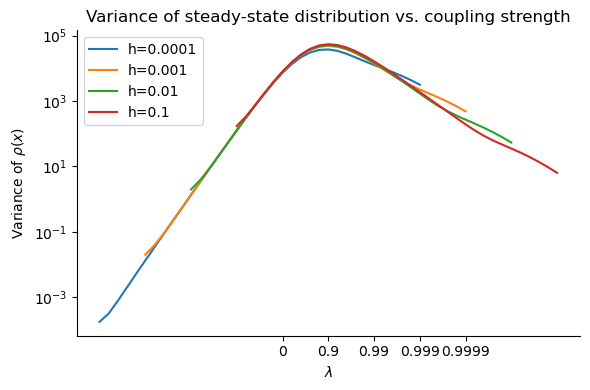

In [35]:
# plot variance as a function of lambda for different h
fig, ax = plt.subplots(figsize=(6,4))
for h in hs:
    ax.plot((1-lams)/h, variances[h]*h, label=f'h={h}')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0])
ax.set_xticklabels(["0.9999", "0.999", "0.99", "0.9", "0"])
ax.invert_xaxis()
# remove boundaries top and right
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('Variance of $\\rho(x)$')
ax.set_title('Variance of steady-state distribution vs. coupling strength')
ax.legend()
plt.tight_layout()

